In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import pickle as pkl
import hist
import matplotlib.pyplot as plt
from analyzer.plotting.core_plots import *
from analyzer.run_analysis import runModulesOnSamples, loadSamples
from analyzer.core import modules as all_modules
loadStyles()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
loadSamples("../datasets")
background=["Skim_QCDInclusive2018", "Skim_WJetsToQQ2018", "Skim_ZJetsToQQ2018", "Skim_TT2018"]
signal=[f"signal_312_{p}" for p in ("2000_1900", "1200_1100", "1500_900", "1200_400", "2000_900")]

data = runModulesOnSamples(all_modules, background+signal, executor="dask_local")

/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36294 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:39021' processes=4 threads=8, memory=11.57 GiB>
ModuleType.BaseObjectDef -- ['objects']
ModuleType.PreSelectionHist -- ['pre_sel_hists']
ModuleType.Selection -- ['baseline_selection']
ModuleType.MainProducer -- ['event_level']
ModuleType.MainHist -- ['event_level_hists', 'chargino_hists', 'jet_hists', 'tag_hists', 'b_hists']
ModuleType.Categories -- ['dataset_category', 'njets_category']


In [ ]:
file_name="output.pkl"
if file_name is None:
    file_name = input()
data = pkl.load(open(file_name, 'rb'))

In [6]:
histos = data["histograms"]

/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


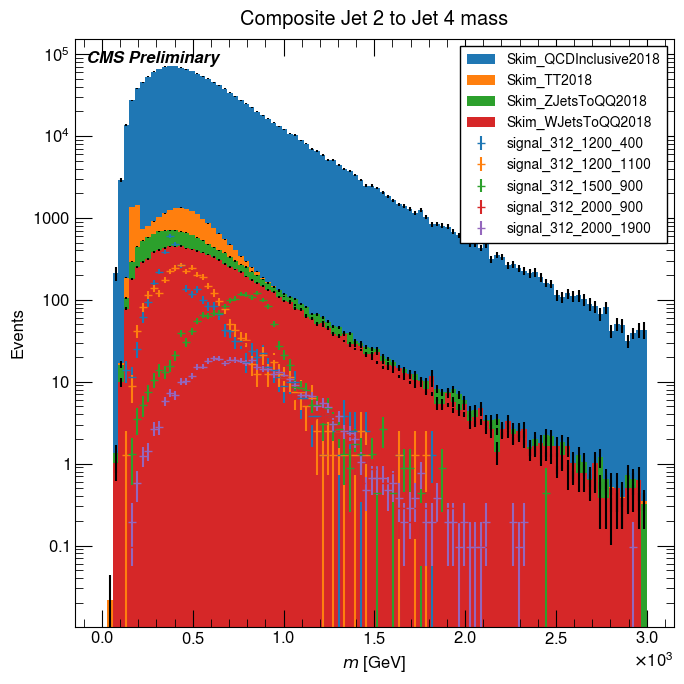

In [9]:
from analyzer.plotting.core_plots import *

h = histos["m24_m"]
fig,ax = drawAs1DHist(h[background, sum,:],cat_axis="dataset",yerr=True)
drawAsScatter(ax, h[signal,sum,:], cat_axis="dataset")
addPrelim(ax)
ax.set_yscale("log")